# House price prediction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [2]:
house_price=pd.read_csv("Bengaluru_House_price.csv")

In [3]:
house_price.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,$39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,$120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,$62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,$95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,$51.00


In [4]:
house_price.shape

(13320, 9)

In [5]:
house_price.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  object 
dtypes: float64(2), object(7)
memory usage: 936.7+ KB


In [7]:
house_price = house_price.drop(['area_type', 'society', 'balcony', 'availability'], axis = 'columns')
house_price.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,$39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,$120.00
2,Uttarahalli,3 BHK,1440,2.0,$62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,$95.00
4,Kothanur,2 BHK,1200,2.0,$51.00


In [8]:
house_price.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
house_price = house_price.dropna()
house_price.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,$39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,$120.00
2,Uttarahalli,3 BHK,1440,2.0,$62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,$95.00
4,Kothanur,2 BHK,1200,2.0,$51.00


In [10]:

house_price['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
house_price['bhk'] = house_price['size'].apply(lambda x : int(x.split(' ')[0]))

In [12]:
house_price.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,$39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,$120.00,4
2,Uttarahalli,3 BHK,1440,2.0,$62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,$95.00,3
4,Kothanur,2 BHK,1200,2.0,$51.00,2


In [13]:

house_price[house_price.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230,27
4684,Munnekollal,43 Bedroom,2400,40.0,660,43


In [14]:

house_price.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def converting_range(x):
    temp=x.split('-')
    if len(temp)==2:
        return(float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
house_price['total_sqft']=house_price['total_sqft'].apply(converting_range)

In [17]:

house_price.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,$39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,$120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,$62.00,3


In [18]:
import re 

In [19]:
def price_of_House(x):
    # Check if x is a string
    cleaned_price=re.sub(r'[^\d.-]','',x)
    numbers=re.findall(r'[-]?\d*\.\d+|\d+',cleaned_price)
    if '-' in x:
        avg_price=(float(numbers[0])+float(numbers[1]))/2
        return avg_price
    else:
        return round(float(cleaned_price),2)

In [20]:
house_price['price']=house_price['price'].apply(price_of_House)

In [21]:
house_price['price']

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13246, dtype: float64

In [22]:
#Getting a new coloumn ('price per square fit')
house_price = house_price.copy()
house_price['price_per_sqft'] = house_price['price'] * 100000 / house_price['total_sqft']

In [23]:

len( house_price.location.unique())

1304

In [24]:
 house_price.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
#Grouping data with respect to location
house_price.location = house_price.location.apply(lambda x : x.strip())
location_stats = house_price.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [26]:
#Getting the number of loations with less than equal to 10 examples
len(location_stats[location_stats<=10])

1052

In [27]:
#Displaying the locations with less examples
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [28]:
#Getting the number of unique location
len(house_price.location.unique())

1293

In [29]:
house_price.location = house_price.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(house_price.location.unique())

242

In [30]:
house_price.head(4)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861


In [31]:
(house_price.total_sqft/house_price.bhk).describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

In [32]:
house_price=house_price[house_price.total_sqft/house_price.bhk>=300]

In [33]:

house_price.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12456.000000,12456.000000,12456.000000,12456.000000,12456.000000
mean,1590.189927,2.562781,114.502936,2.649004,6380.127877
std,1260.404795,1.080275,407.242923,0.976046,9124.612876
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,42278.000000,16.000000,912343.547691


In [34]:

house_price.shape

(12456, 7)

In [35]:
house_price.price_per_sqft.describe()

count     12456.000000
mean       6380.127877
std        9124.612876
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      912343.547691
Name: price_per_sqft, dtype: float64

In [36]:
#checking columns where 'price_per_sqft' is very low

#where it should not be that low, so it's an anomaly and

#we have to remove those rows

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
house_price = remove_pps_outliers(house_price)
house_price.shape

(10450, 7)

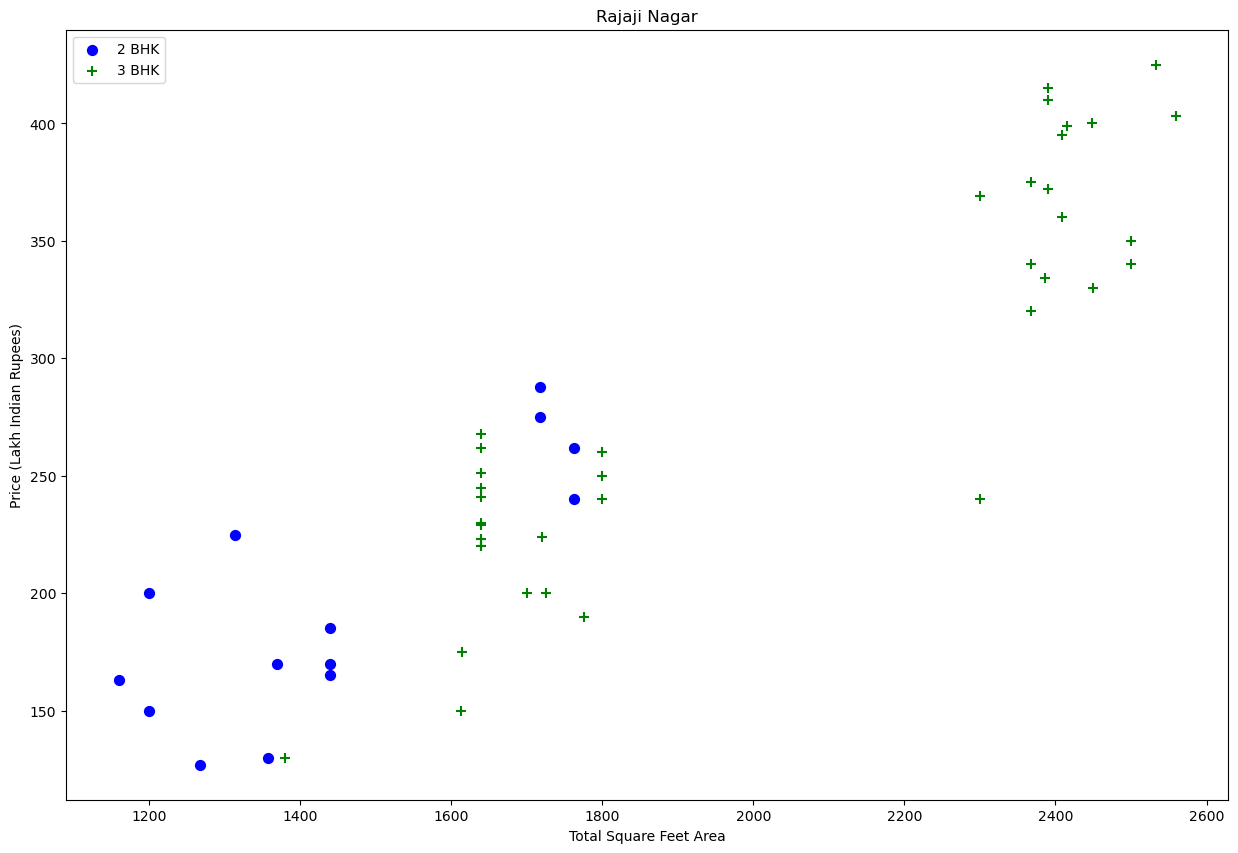

In [38]:
def plot_scatter_chart(house_price,location):
    bhk2 = house_price[(house_price.location==location) & (house_price.bhk==2)]
    bhk3 = house_price[(house_price.location==location) & (house_price.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
 
plot_scatter_chart(house_price,"Rajaji Nagar")

In [39]:
def remove_bhk_outliers(house_price):
    exclude_indices = np.array([])
    for location, location_df in house_price.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
          }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return house_price.drop(exclude_indices,axis='index')
house_price = remove_bhk_outliers(house_price)

In [40]:
house_price.shape

(7304, 7)

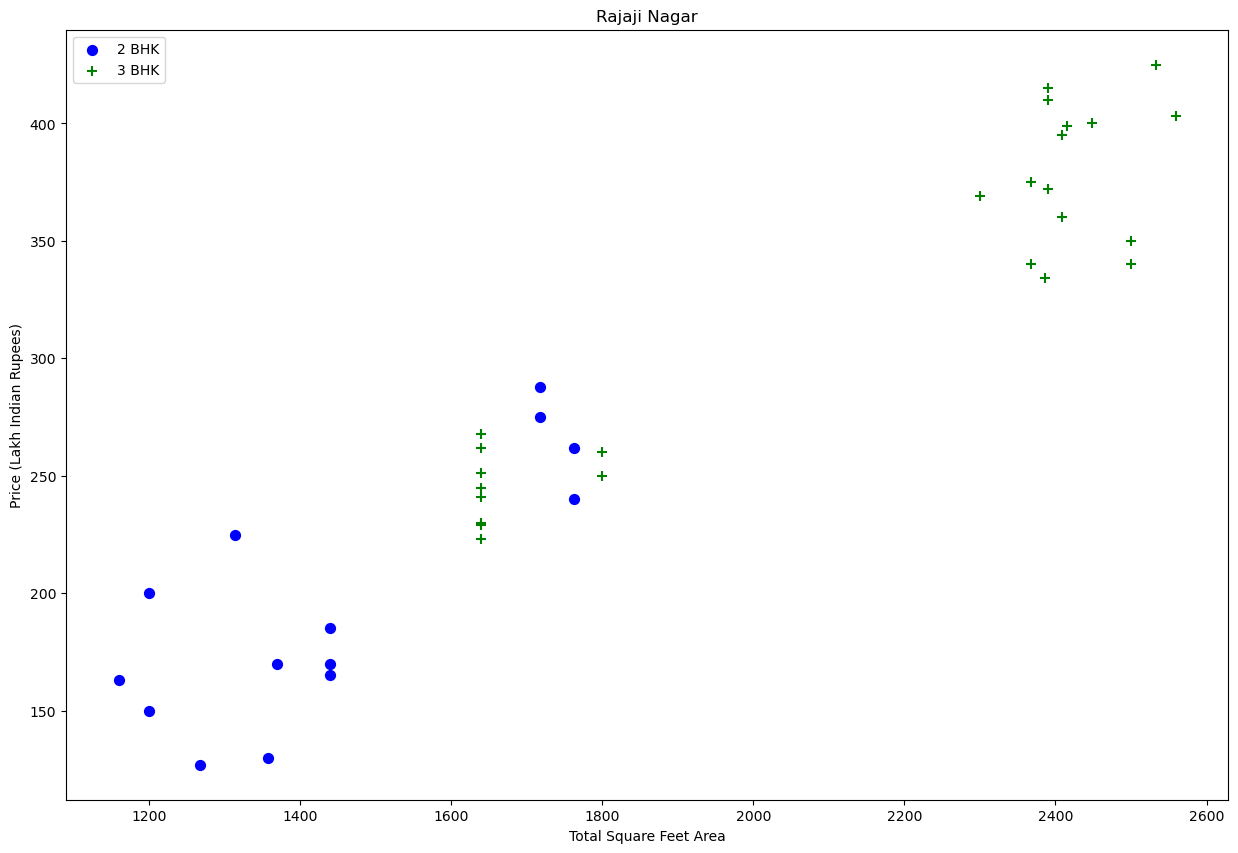

In [41]:
plot_scatter_chart(house_price,"Rajaji Nagar")

In [42]:
house_price.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


Text(0, 0.5, 'Count')

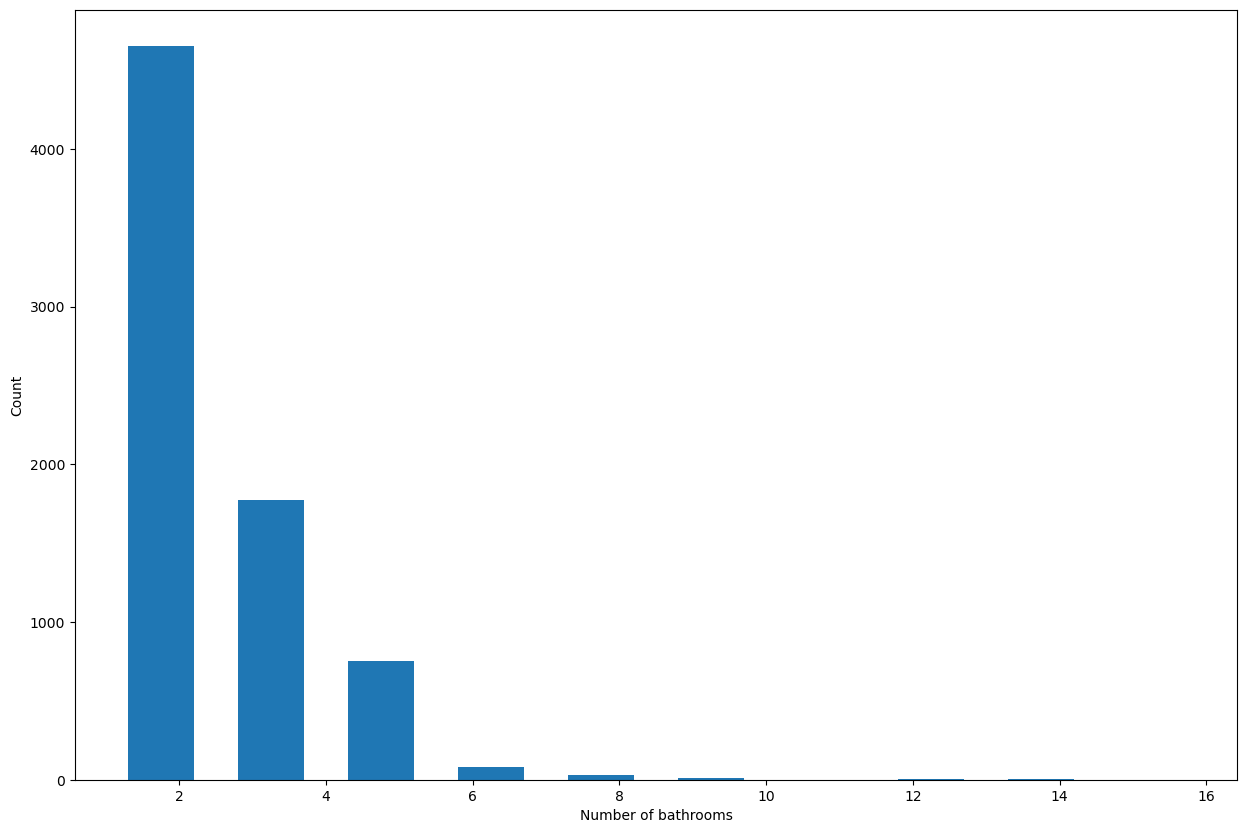

In [43]:
plt.hist(house_price.bath,rwidth=0.6)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [44]:

house_price[house_price.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5278,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8157,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152
8625,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9438,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9803,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [45]:
house_price[house_price.bath>house_price.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1627,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5239,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6712,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8157,other,9 Bedroom,3300.0,14.0,500.0,9,15151.515152


In [46]:
house_price = house_price[house_price.bath<house_price.bhk+2]
house_price.shape

(7218, 7)

In [47]:
house_price.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [48]:
house_price = house_price.drop(['size','price_per_sqft'],axis='columns')
house_price.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


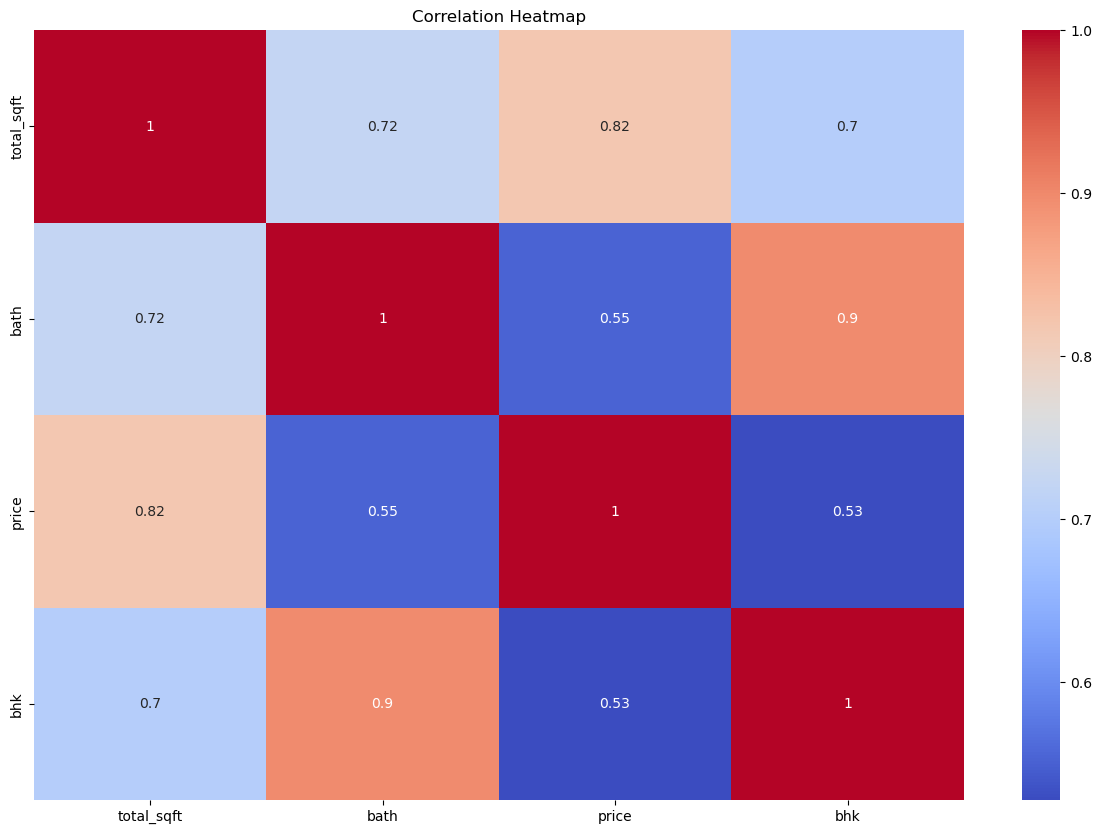

In [51]:
corr_matrix = house_price.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [52]:
dummies = pd.get_dummies(house_price.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
house_price = pd.concat([house_price,dummies.drop('other',axis='columns')],axis='columns')
house_price.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
house_price = house_price.drop('location',axis='columns')
house_price.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:

X = house_price.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
y = house_price.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [58]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 

X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [59]:
X_train

array([[-0.94769146, -1.46775899, -1.6083353 , ..., -0.06460583,
        -0.03225247, -0.07226923],
       [-0.38515943, -0.44472176, -0.53623555, ..., -0.06460583,
        -0.03225247, -0.07226923],
       [-1.25805397, -1.46775899, -1.6083353 , ..., -0.06460583,
        -0.03225247, -0.07226923],
       ...,
       [-0.6518772 , -0.44472176, -0.53623555, ..., -0.06460583,
        -0.03225247, -0.07226923],
       [ 5.47050812,  5.69350161,  5.89636294, ..., -0.06460583,
        -0.03225247, -0.07226923],
       [-0.71249488, -0.44472176, -0.53623555, ..., -0.06460583,
        -0.03225247, -0.07226923]])

# Linear regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
from sklearn.metrics import r2_score

In [63]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred = linear_regression_model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)



R-squared (R2): 0.7172185539182105


# Use K Fold cross validation to measure accuracy of our LinearRegression model

In [64]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.76157429, 0.79255056, 0.68239313, 0.77105192, 0.78294429])

# GridSearchCV for finding the best algorithm

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [68]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [69]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.758103,{'normalize': False}
1,lasso,0.663000,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.585833,"{'criterion': 'mse', 'splitter': 'best'}"


In [70]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return lr_clf.predict([x])[0]

In [71]:
predict_price('1st Phase JP Nagar',1000,2,2)

107121.57824732689

In [72]:
predict_price('1st Phase JP Nagar',1000,1,3)

107111.60366603093

In [73]:
predict_price('Indira Nagar',1000,2,2)

107127.25886298416